In [1]:
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

plot_df = pd.DataFrame({
    'col1': [1, 3, 2, 4],
    'col2': [3, 6, 5, 1],
    'col3': [4, 7, 6, 2],
})

plot_df

,col1,col2,col3
0,1,3,4
1,3,6,7
2,2,5,6
3,4,1,2


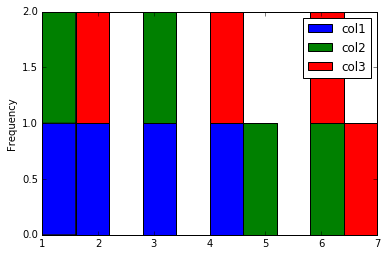

In [2]:
plot_df.plot(kind='hist', stacked=True)

In [3]:
import psycopg2
import sys
import re


import numpy as np
import pandas as pd
from scipy import stats, integrate

%matplotlib inline
import matplotlib.pyplot as plt


#Define our connection string
conn_string = "host='52.43.75.12' port='5432' dbname='ndexstats' user='ndexstats' password='dashboard101'"

# print the connection string we will use to connect
# print "Connecting to database\n\t->%s" % (conn_string)

# get a connection, if a connect cannot be made an exception will be raised here
try:
    conn = psycopg2.connect(conn_string)
except:
    e = sys.exc_info()[0]
    print "Error: %s" % e 
    sys.exit()


# conn.cursor will return a cursor object, you can use this cursor to perform queries
cursor = conn.cursor()
# print "Connected!\n"



query1 = "select count(*) from ndexstats where api = 'AdminService.getStatus'"
query2 = "select count(*) from ndexstats where api = 'GroupService.findGroups'"
query3 = "select count(*) from ndexstats where api = 'NetworkAService.getEdges'"  
query4 = "select count(*) from ndexstats where api = 'TaskService.createTask'"
query5 = "select count(*) from ndexstats where api = 'TaskService.deleteTask'"



cursor.execute(query1)
number_of_getStatus = cursor.fetchone()[0]

cursor.execute(query2)
number_of_findGroups = cursor.fetchone()[0]

cursor.execute(query3)
number_of_getEdges = cursor.fetchone()[0]

cursor.execute(query4)
number_of_createTask = cursor.fetchone()[0]

cursor.execute(query5)
number_of_deleteTask = cursor.fetchone()[0]

cursor.close()
conn.close()

print "number_of_getStatus=", number_of_getStatus, " number_of_findGroups=", number_of_findGroups, \
    " number_of_getEdges=", number_of_getEdges, " number_of_createTask=", number_of_createTask, \
    " number_of_deleteTask=", number_of_deleteTask


#apis = ['getStatus', 'findGroups', 'getEdges', 'createTask', 'deleteTask' ]
#number_of_calls = [number_of_getStatus, number_of_findGroups, \
#                   number_of_getEdges, number_of_createTask, number_of_deleteTask]

#dataSet = list(zip(apis, number_of_calls))
#print 'dataSet=', dataSet

df = pd.DataFrame({
    'AdminService.getStatus': [number_of_getStatus],
    'GroupService.findGroups': [number_of_findGroups],
    'NetworkAService.getEdges': [number_of_getEdges],
    'TaskService.createTask': [number_of_createTask],
    'TaskService.deleteTask': [number_of_deleteTask], 
})

df


number_of_getStatus= 4  number_of_findGroups= 13  number_of_getEdges= 11  number_of_createTask= 4  number_of_deleteTask= 31


,AdminService.getStatus,GroupService.findGroups,NetworkAService.getEdges,TaskService.createTask,TaskService.deleteTask
0,4,13,11,4,31


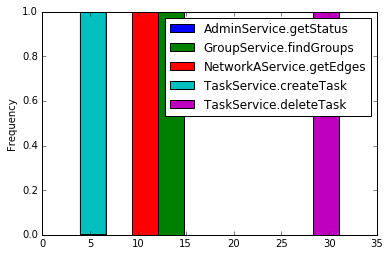

In [4]:
df.plot(kind='hist')